# Machine Learning

## Topic: Regression Analysis of Medical Insurance Costs in the U.S

### Abstract

The United States spends significantly more on healthcare compared to other nations and such spending is expected to continue growing. That trend will increase the nation’s growing debt even further. This study will examine personal medical insurance costs in the United States, focusing on factors such as age, gender, body mass index, number of children, smoking habits, and residing region in the country. The medical insurance costs were evaluated on a yearly basis. We will begin by doing some exploratory analysis of the dataset and then building a multiple linear regression model in order to predict future prices of medical insurance. 

### Required Libraries ... 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import mpl_toolkits.mplot3d
import seaborn as sns 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  

### Dataset ...

In [2]:
df = pd.read_csv('C:\\Users\\ferna\\OneDrive\\Desktop\\projects\\Machine Learning\\InsuranceDataset.csv')

# Exploratory Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is an equal count for every variable and there are no null counts. 

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The mean age of people of observed is 39, with the whole dataset ranging from age 18 to 64. The charges also span a broad range with the lowest being 1,121 and the highest being 63,770 and averaging at $13,270.

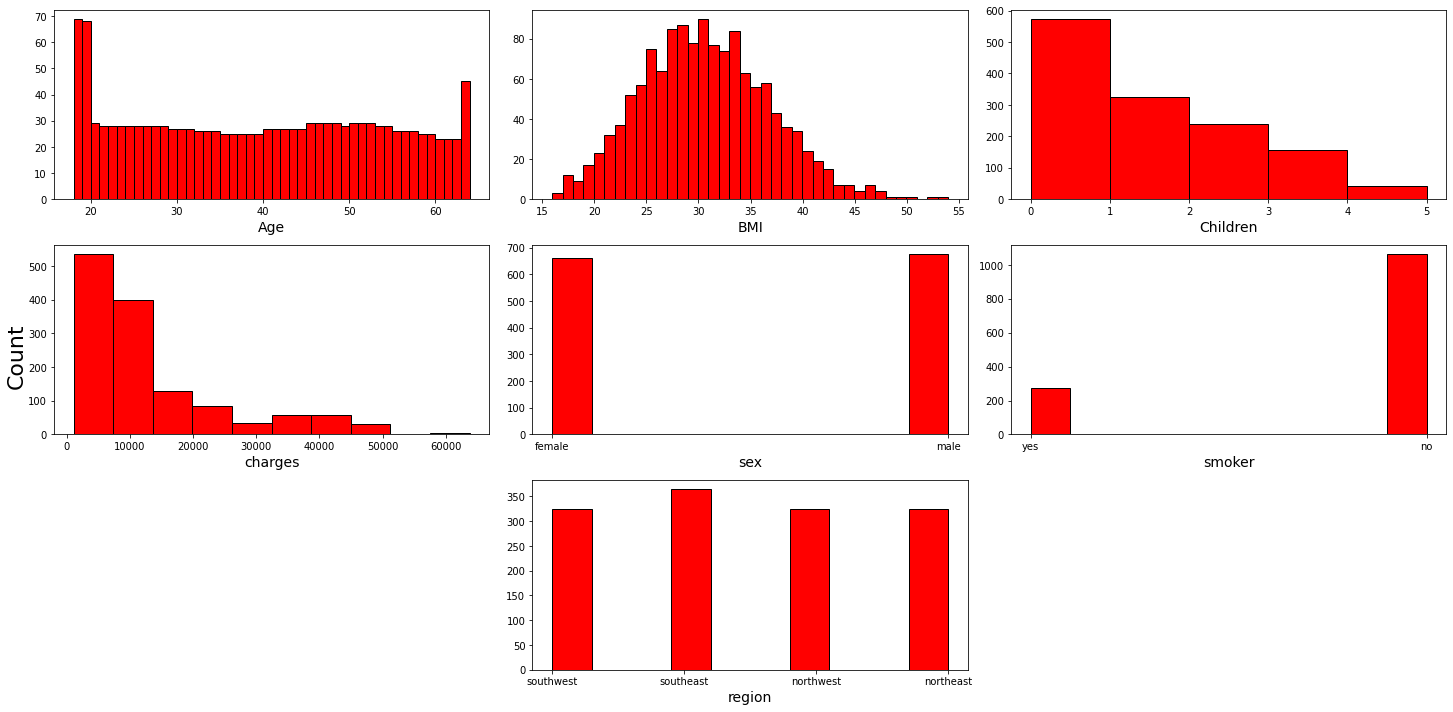

In [7]:
fig, axis = plt.subplots(3,3, figsize = (20,10))
fig.text(0,0.5,'Count',style='normal',fontsize=22,ha='center', va='center', rotation='vertical')
var_list = ['age','bmi','children','charges','sex','smoker','region']
axis[0,0].hist(var_list[0],data=df,color='red', edgecolor='black',bins=np.arange(df['age'].min(), df['age'].max()+1))
axis[0,0].set_xlabel('Age',fontsize=14)
axis[0,1].hist(var_list[1],data=df,color='red',edgecolor='black',bins=np.arange(df['bmi'].min(), df['bmi'].max()+1))
axis[0,1].set_xlabel('BMI',fontsize=14)
axis[0,2].hist(var_list[2],data=df,color='red',edgecolor='black',bins=np.arange(df['children'].min(), df['children'].max()+1))
axis[0,2].set_xlabel('Children',fontsize=14)
axis[1,0].hist(var_list[3],data=df,color='red',edgecolor='black') 
axis[1,0].set_xlabel('charges',fontsize=14)
axis[1,1].hist(var_list[4],data=df,color='red',edgecolor='black')
axis[1,1].set_xlabel('sex',fontsize=14)
axis[1,2].hist(var_list[5],data=df,color='red',edgecolor='black')
axis[1,2].set_xlabel('smoker',fontsize=14)
axis[2,1].hist(var_list[6],data=df,color='red',edgecolor='black')
axis[2,1].set_xlabel('region',fontsize=14)
fig.delaxes(axis[2,0])
fig.delaxes(axis[2,2])
fig.tight_layout() 

Looking at these distributions we learn that, surprisingly, people below 20 make up most of the observations. BMI is normally distributed with majority of the people falls between the range 25-35. Most People seem to have at least one child and most yearly medical bills are below $20,000 and the distribution is very right-skewed, foreshadowing some outliers. An equal number of males and females were observed for the data set and there is a significantly lower number of non-smokers than smokers. Finallly, all regions seems to have virtually equal representation except the southeast, which is slightly higher than the rest. 

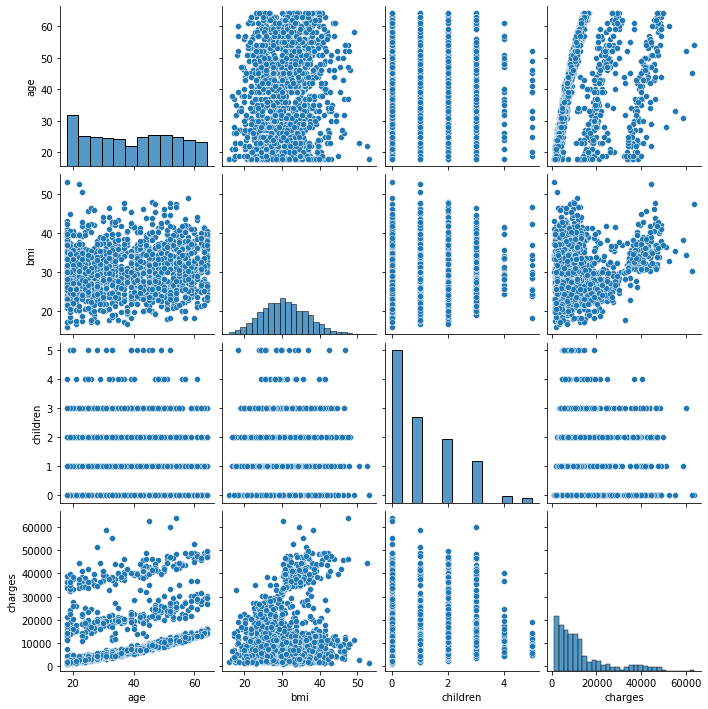

In [8]:
sns.pairplot(data=df)

Looking at the above pair plot we can see, again, that bmi is normally distributed, with most participants hovering around 30 BMI, and as bmi increases, charges also increase. Charges also appear to increase with age. Surprisingly, however, the more children one has, the lower the medical insurance costs. 

<AxesSubplot:>

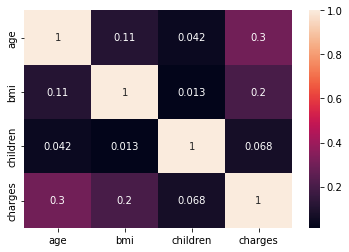

In [9]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

Here we can see that no 2 variables are highly correlated with one another. 

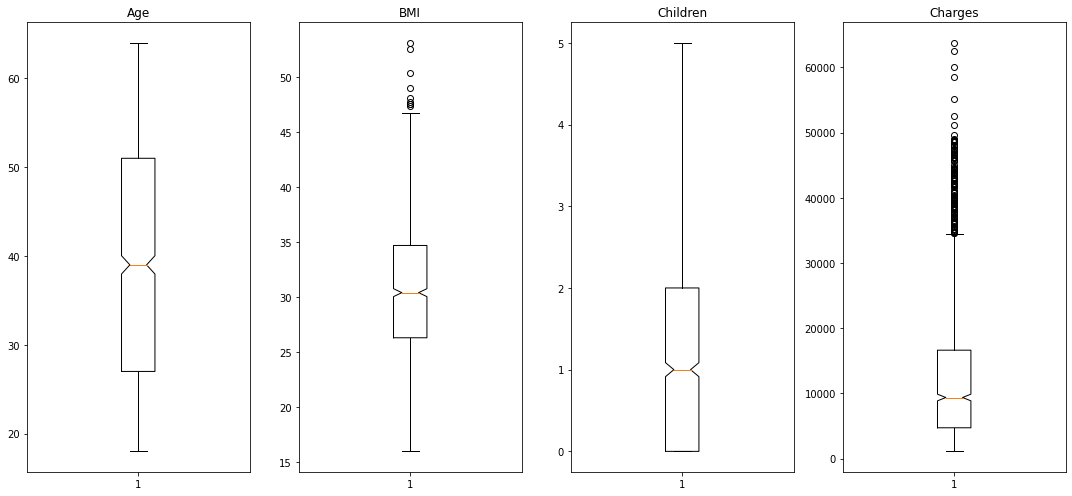

In [10]:
x1 = df[['age']]
x2 = df[['bmi']]
x3 = df[['children']]
x4 = df[['charges']]
fig, axis = plt.subplots(1,4, figsize = (15,7))
axis[0].boxplot(x1,notch=True)
axis[0].set_title('Age')
axis[1].boxplot(x2,notch=True)
axis[1].set_title('BMI')
axis[2].boxplot(x3,notch=True)
axis[2].set_title('Children')
axis[3].boxplot(x4,notch=True)
axis[3].set_title('Charges')
fig.tight_layout()

Looking at the box plots of the numeric values above, we can see that there are outliers in BMI, despite being normally distributed. Charges, as suspected, has many outliers past the upper whisker, which stops at about $35,000. 

# Building Regression Model

Since we have some object-type columns we will need to convert those into dummy variables so we can fit out regression model ... 

In [11]:
sex = pd.get_dummies(df['sex'],drop_first=True)
df['male'] = sex
df.head(3)

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.90,0,yes,southwest,16884.9240,0
1,18,male,33.77,1,no,southeast,1725.5523,1
2,28,male,33.00,3,no,southeast,4449.4620,1


In [12]:
smoker = pd.get_dummies(df['smoker'],drop_first=True)
df['yes'] = smoker
df.head(3)

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.90,0,yes,southwest,16884.9240,0,1
1,18,male,33.77,1,no,southeast,1725.5523,1,0
2,28,male,33.00,3,no,southeast,4449.4620,1,0


In [13]:
regions = pd.get_dummies(df['region'],drop_first=True)
df = pd.concat([df,regions],axis = 1)
df.head(3)

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0,1,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,1,0,0,1,0
2,28,male,33.00,3,no,southeast,4449.4620,1,0,0,1,0


In [14]:
df = df.drop(['sex','smoker','region'],axis = 1)
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [15]:
df.rename(columns={'yes':'smoker'}, inplace=True)
df.head(3)

,age,bmi,children,charges,male,smoker,northwest,southeast,southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


Now that we have converted our objects into dummy variables, this is what our formula would look like ... <br> <br>
Medical Insurance Charges = β0 + β1*(age) + β2*(bmi) + β3*(children) + β4*(sex) + β5*(smoker) + β6*(northwest) + β7*(southeast) + β8*(southwest)<br>

In [16]:
lm = LinearRegression()
x = df.drop(['charges'],axis = 1)
y = df['charges']

In [17]:
reg = lm.fit(x,y)
r2 = reg.score(x,y)
print('R^2 =',r2)

R^2 = 0.7509130345985207


Here we can see we have an R-squared value of 0.75 or 75 %. This stat measures the correlation of the independent variables to the dependent variable (charges/yr) in a multiple regression model. This means that about 75% of the outcomes are explained by the independent variables which indicates that it’s a good fit. 

## Cross-Validation

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, like the regression model we just built, and one wants to estimate how accurately a predictive model will perform in practice by producing R-squared scores for each test set. 
The goal of cross-validation is to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., new, previously unseen data).

In [19]:
scores = cross_val_score(reg,x,y,cv=5)
print('Scores:',scores)
print('Mean Score:',np.mean(scores))
print('Score Std:',scores.std())

Scores: [0.76148179 0.70649339 0.77806343 0.73269475 0.75557475]
Mean Score: 0.7468616243473744
Score Std: 0.024873741442236752


Here I split our dataset into 5 folds, each of which was used both as a training set and a test set. We can see the score for each individual test and the mean score of them all which, when rounded up, came out to 75% as well indicating that our model is a good fit. 

Now we will look at a full summary of the regression results using the StatsModel results table ... 

In [20]:
X = sm.add_constant(x)

In [20]:
sum_ = sm.OLS(y,X)
summary = sum_.fit()
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        17:43:56   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04    987.819    -12.086      0.0

<p>Looking at the OLS summary above, we can confirm the R-squared value of 75% and we also now can see the Adjusted R-squared value at 0.749. Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model, in this case, 9 predictors.</p>We can also see the P>|t| stat, or the P-value, for each predictor. A p-value is a statistical measurement used to validate a hypothesis against observed data. The lower the p-value, the greater the statistical significance of the observed difference and a value of 0.05 or lower is statistically significant. Here we can see that all of our variables are significant in determining insurance costs except for the sex of a person and someone being from the northwest. 

In [21]:
print('Intercept:', reg.intercept_) 
print('Coefficients:', reg.coef_)

Intercept: -11938.538576167142
Coefficients: [  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


The above values are the intercept and coefficients values of the models which can be put in the previously mentioned formula as below in order to make a prediction: <br><br> Medical Insurance Charges = -11,938.54 + 256.86*(age) + 339.19*(bmi) + 475.50*(children) - 131.31*(sex) + 23848.53*(smoker) - 352.96*(northwest) - 1035.02*(southeast) - 960.05*(southwest)

Based on the regression coefficients, we can see that the largest factor, by far, in high medical insurance costs is whether or not the individual was a smoker, accounting for about a whopping $23,848 increase in yearly costs if the subject was a smoker. As suspected, costs increase with age as well and somewhat surprisingly, men pay slightly less than women, saving \\$131.31 at the doctors office. Americans in the south also pay much less in insurance than those living in the Northern states, that may have something to do with with the cost of living in big northern cities. Charges also increase with the number of children in the household and also with the participants BMI. 

# Vizualizations

In [22]:
y_predict = lm.predict(x)
df['predicted charges'] = y_predict

In [23]:
df[['charges','predicted charges']]

,charges,predicted charges
0,16884.92400,25293.713028
1,1725.55230,3448.602834
2,4449.46200,6706.988491
3,21984.47061,3754.830163
4,3866.85520,5592.493386
...,...,...
1333,10600.54830,12351.323686
1334,2205.98080,3511.930809
1335,1629.83350,4149.132486
1336,2007.94500,1246.584939


In [24]:
df[['charges','predicted charges']].describe()

,charges,predicted charges
count,1338.000000,1338.000000
mean,13270.422265,13270.422265
std,12110.011237,10493.959110
min,1121.873900,-2032.911070
25%,4740.287150,5827.642735
50%,9382.033000,10277.164129
75%,16639.912515,15217.932261
max,63770.428010,40834.808725


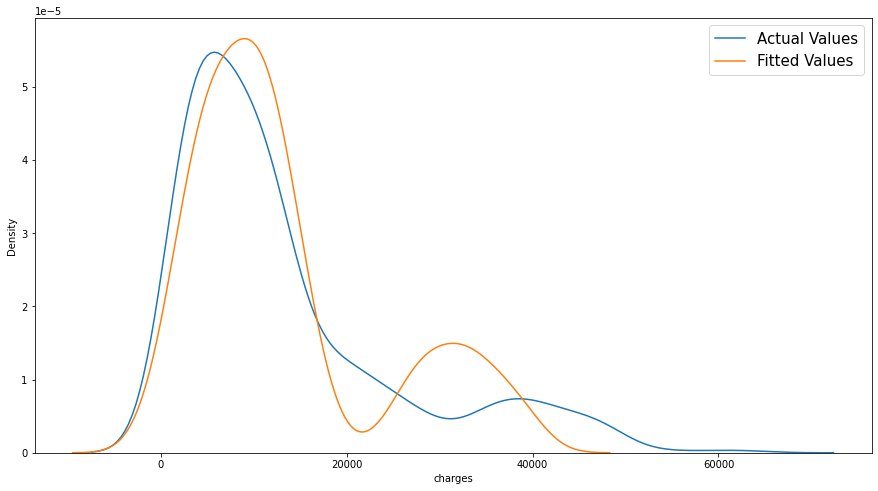

In [45]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x='charges',label='Actual Values')
sns.kdeplot(data=df, x='predicted charges',label='Fitted Values')
plt.legend(facecolor='white',prop={'size': 15})

Looking at the distribution plot, we can see that the distribution for the dataset is pretty right-skewed. The dataset peaks at about $13,000 and tops out at over \\$60,000. Our regression model, however, is interestingly predicting a bimodal distribution with a second local maximum around \\$30,000. The regression also predicts that charges should reach a max at just over \\$40,000. 

<AxesSubplot:xlabel='charges', ylabel='predicted charges'>

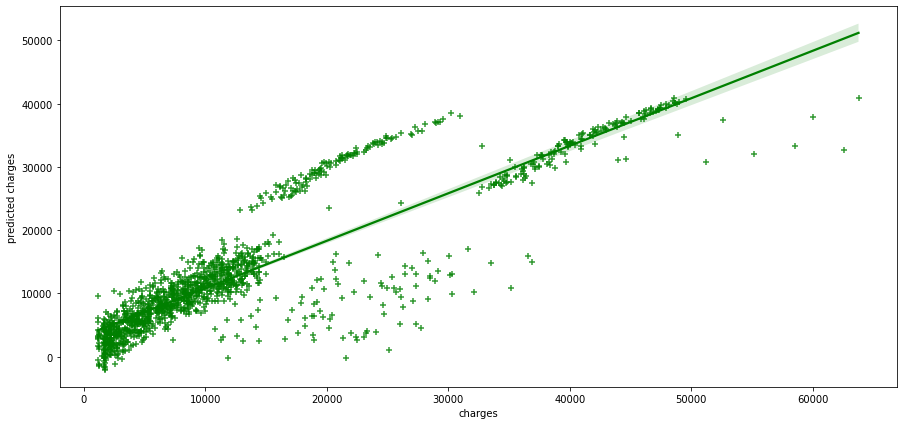

In [26]:
plt.figure(figsize=(15,7))
sns.regplot(y=df['predicted charges'], x=df['charges'],marker='+',fit_reg=True,color='green')

The regression plot above gives us another look at our predicted charges when compared to the actual charges in the dataset. We confirm once again the majority of charges around $13,000 and below and we can see the second local maximum around \\\$30,000 for predicted charges. 